# Evalutation results for DBpedia

In [1]:
import pandas as pd
import sys
sys.path.append('../code/')
from utils.plot import plot

## Previous results

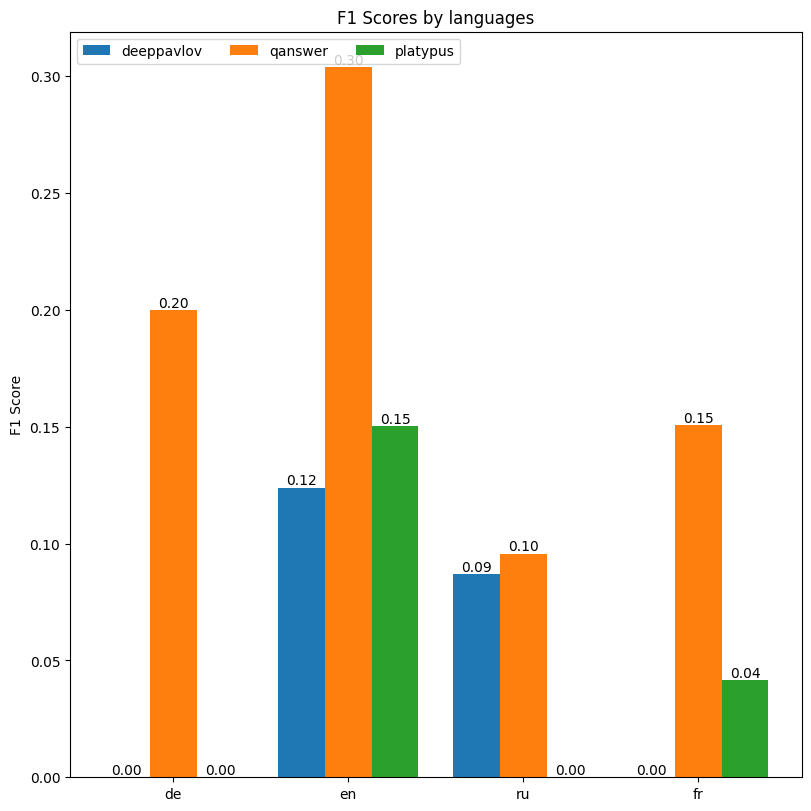

In [12]:
deeppavlov = pd.read_csv("../previous_paper_results/DeepPavlov_dbpedia.csv")
qanswer = pd.read_csv("../previous_paper_results/QAnswer_dbpedia.csv")
platypus = pd.read_csv("../previous_paper_results/Platypus_dbpedia.csv")
plot({
    "deeppavlov": deeppavlov,
    "qanswer": qanswer,
    "platypus": platypus
}, x_distance=1.5)

## Baseline

First, we only fine-tuned mT5-base model on qald-9-plus with DBpedia SPARQLs for 100 epochs as our baseline. 

**Keypoints**:

- without pre-training
- fine-tune on qald-9-plus
    - train for 100 epochs (as for Wikidata)
    - use all languages

In [7]:
# https://gerbil-qa.aksw.org/gerbil/experiment?id=202307050006
baseline = pd.read_csv("../gerbil_results/baseline-mt5base-qald9-dbp.csv")
baseline

,Language,Micro F1,Micro Precision,Micro Recall,Macro F1,Macro Precision,Macro Recall,Macro F1 QALD
0,ba,0.0782,0.2438,0.0466,0.2905,0.2892,0.2998,0.4385
1,be,0.1632,0.2584,0.1192,0.3943,0.3950,0.3989,0.5220
2,de,0.2079,0.6032,0.1256,0.3961,0.3953,0.4078,0.5296
3,en,0.1877,0.1686,0.2115,0.3975,0.4020,0.4112,0.5390
4,es,0.0973,0.0645,0.1982,0.4107,0.4150,0.4154,0.5441
5,fr,0.0434,0.4881,0.0227,0.2599,0.2600,0.2598,0.4090
6,ja,0.0433,0.0269,0.1114,0.3774,0.3760,0.3922,0.5165
7,lt,0.0762,0.0480,0.1841,0.3784,0.3818,0.3932,0.5217
8,ru,0.0477,0.0274,0.1844,0.3642,0.3685,0.3787,0.4984
9,uk,0.0828,0.0524,0.1979,0.3910,0.3953,0.4018,0.5261


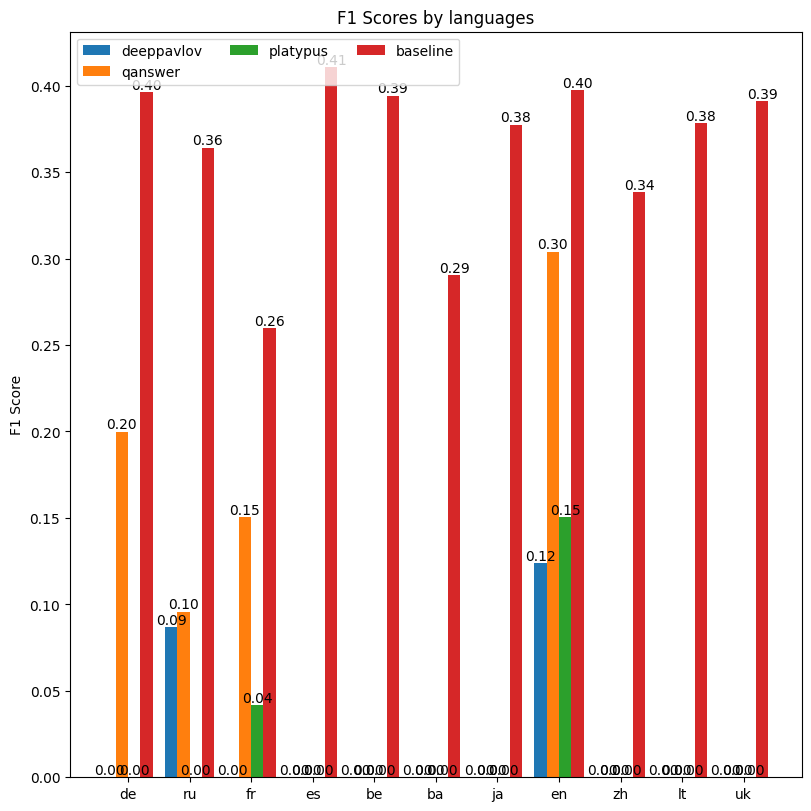

In [14]:
plot({
    "deeppavlov": deeppavlov,
    "qanswer": qanswer,
    "platypus": platypus,
    "baseline": baseline
}, x_distance=2)

Superisingly, our baseline results already exceed other systems. However, it could caused by some SPARQLs are not available now anymore. Even our system doesn't generate the correct SPARQL, it will still get a high F1 score for the questions in the reference data set, which also don't have any answer.

## Experiment 10

According to the experience from experiment for Wikidata, we first pre-trained on LCquad 1.0 (about 4000 samples) and fine-tuned on qald-9-plus with all language questions DBpedia SPARQLs.

**Keypoints**:

- pre-train on LC-QuAD 1.0
    - train for 32 epochs
    - with linguistic context and entity knowledge
- fine-tune on qald-9-plus
    - train for 15 epochs
    - use all languages
    - with linguistic context and entity knowledge 

Since our entity linking tool for DBpedia only works for `en`, `de`, and `fr`, we only evaluated our model on these languages. 

In [15]:
# https://gerbil-qa.aksw.org/gerbil/experiment?id=202306300002
exp10 = pd.read_csv("../gerbil_results/exp10-mt5xl-lcquad1-lc-et-dbp.csv")
exp10

,Language,Micro F1,Micro Precision,Micro Recall,Macro F1,Macro Precision,Macro Recall,Macro F1 QALD
0,de,0.0139,0.0077,0.0693,0.3531,0.3513,0.3694,0.5165
1,en,0.0469,0.0282,0.1397,0.3813,0.3938,0.3863,0.5211
2,fr,0.0147,0.0118,0.0194,0.2400,0.2400,0.2465,0.3939


Also from the previous experiments, the results could be better when the langauge model is fine-tuned on less langauges. Therefore, we fine-tuned our model again on qald-9-plus with only `en`, `de`, and `fr`, which are supported by our entity linker, and DBpedia SPARQL. 

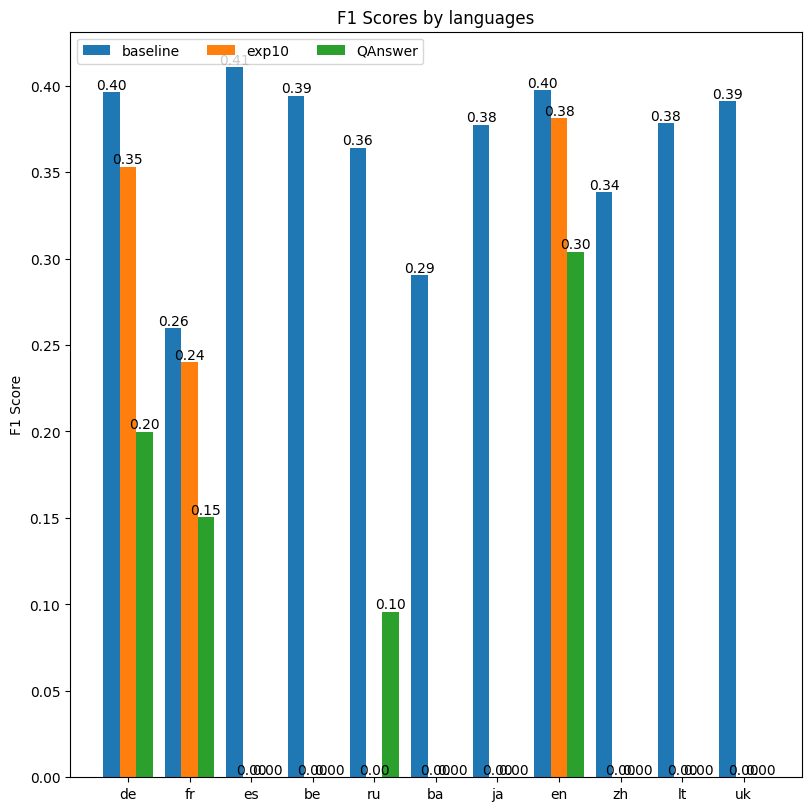

In [16]:
plot({
    "baseline": baseline,
    "exp10": exp10,
    "QAnswer": qanswer
}, x_distance=1.5)

However, exp10 is even worse than our baseline.

In [17]:
# https://gerbil-qa.aksw.org/gerbil/experiment?id=202307010000
exp10_endefr = pd.read_csv("../gerbil_results/exp10-mt5xl-lcquad1-lc-et-dbp-endefr.csv")
exp10_endefr

,Language,Micro F1,Micro Precision,Micro Recall,Macro F1,Macro Precision,Macro Recall,Macro F1 QALD
0,de,0.0102,0.0056,0.0604,0.3726,0.3706,0.3835,0.5234
1,en,0.2262,0.6820,0.1356,0.4249,0.4336,0.4247,0.5597
2,fr,0.0246,0.9783,0.0125,0.2533,0.2533,0.2532,0.4035


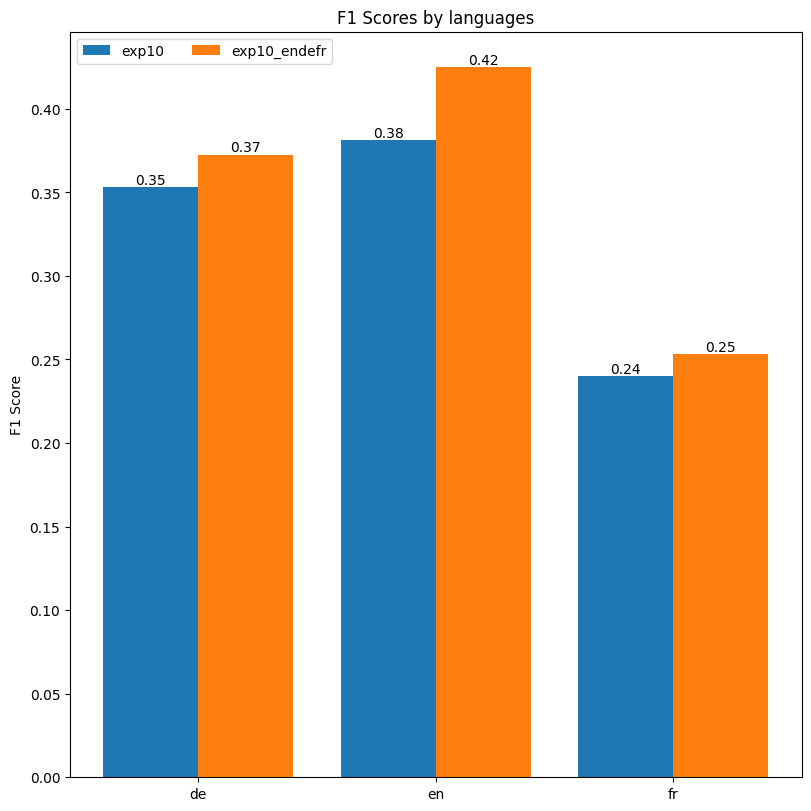

In [18]:
plot({
    "exp10": exp10,
    "exp10_endefr": exp10_endefr
})

The performance is better compare to fine-tuned on all langauges from qald-9-plus.

The reason for that may be the language model focuses on fewer languages, which has been also observed in previous experiments only fine-tuned on English questions. 
The performance of English is better than fine-tuning on more languages. 


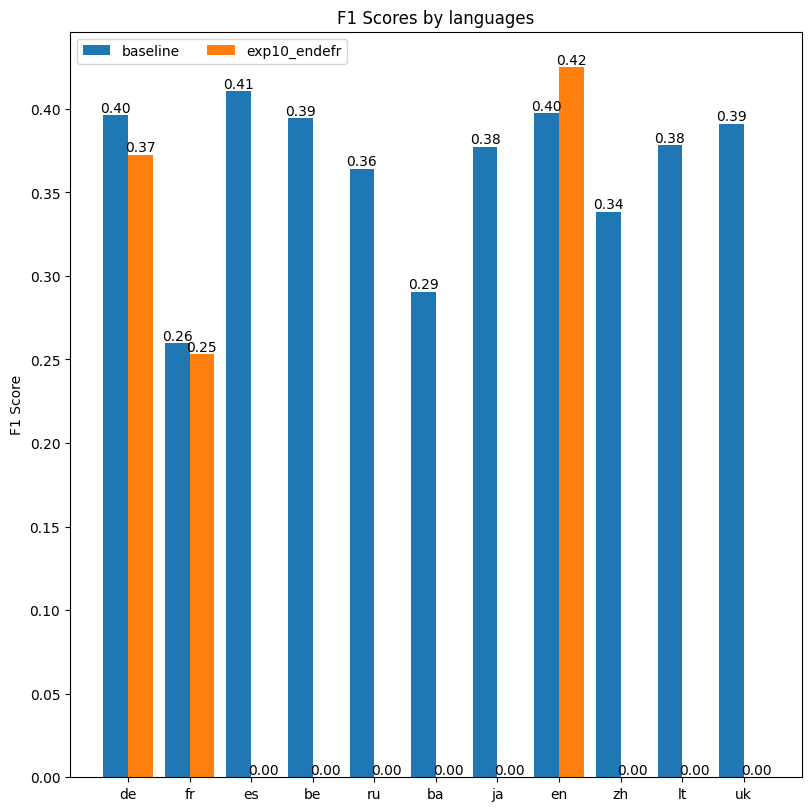

In [19]:
plot({
    "baseline": baseline,
    "exp10_endefr": exp10_endefr
})

Now, F1 Score for `fr` is almost the same as for baseline, and exp10_endefr performs better than our baseline in `en`.

Comparing baseline and exp10_endefr, the exp10_endefr only performs better in English, the reason for it could be that the entity linker doesn't give the correct entities for some questions. 
Moreover, the entity linker always tries to give the entity uri in the same language as the question language. 
It could happen that the entity is available in English, but not in other langauges. 
Thus, providing entity knowledge from entity linking is not very reliable for other languages besides English. 

## Experiment 11

In this experiment, we simulated a situation that no entity linker available. 
There is no available entity linker for any language other than `en`, `de`, and `fr`, therefore, in experiment 11, we are able to fine-tune and evaluate on all languages in qald-9-plus. 

We used the same pre-trained model in experiment 10, and excluded entity knowledge from fine-tuning data set. 
All languages in qald-9-plus are included in our fine-tuning data set.

**Keypoints**:

- pre-train on LC-QuAD
    - train for 32 epochs
    - with linguistic context and entity knowledge
- fine-tune on qald-9-plus
    - train for 15 epochs
    - use all languages
    - with linguistic context

In [6]:
exp11 = pd.read_csv("../gerbil_results/exp11-mt5xl-lcquad1-lc-ptet-dbp.csv")
exp11

,Language,Micro F1,Micro Precision,Micro Recall,Macro F1,Macro Precision,Macro Recall,Macro F1 QALD
0,ba,0.0245,0.0146,0.0773,0.3051,0.3070,0.3233,0.4699
1,be,0.0554,0.0327,0.1805,0.4219,0.4331,0.4340,0.5675
2,de,0.1152,0.0792,0.2107,0.4449,0.4511,0.4625,0.5993
3,en,0.0828,0.0528,0.1916,0.4655,0.4694,0.4936,0.6208
4,es,0.1049,0.0721,0.1924,0.4543,0.4644,0.4726,0.5972
5,fr,0.0449,0.9022,0.0230,0.2666,0.2667,0.2665,0.4191
6,ja,0.1001,0.0686,0.1855,0.4386,0.4445,0.4561,0.5873
7,lt,0.0848,0.0546,0.1905,0.4227,0.4337,0.4340,0.5739
8,ru,0.1287,0.0978,0.1882,0.4165,0.4194,0.4336,0.5639
9,uk,0.0499,0.0287,0.1902,0.4196,0.4288,0.4387,0.5655


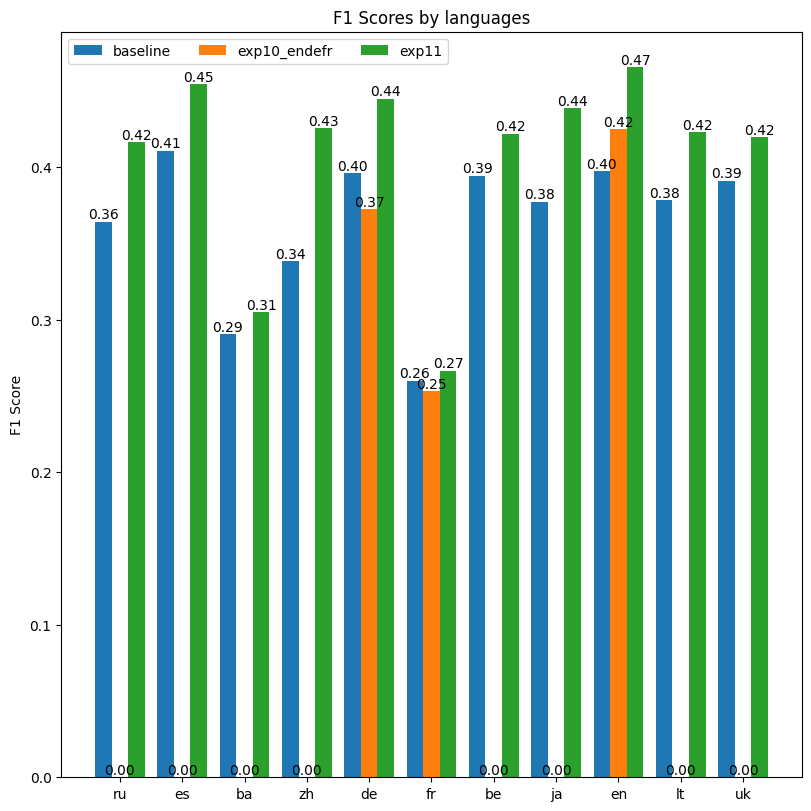

In [21]:
plot({
    "baseline": baseline,
    "exp10_endefr": exp10_endefr,
    "exp11": exp11
}, x_distance=1.5)

According to the chart, experiment 11 performs the best in all languages. 

Now in Experiment 11, we did not add entity knowledge in fine-tuning and inference, but let the language model learn the entity knowledge by itself. 
With this ability from the language model, the results are the best and this model supports more languages.

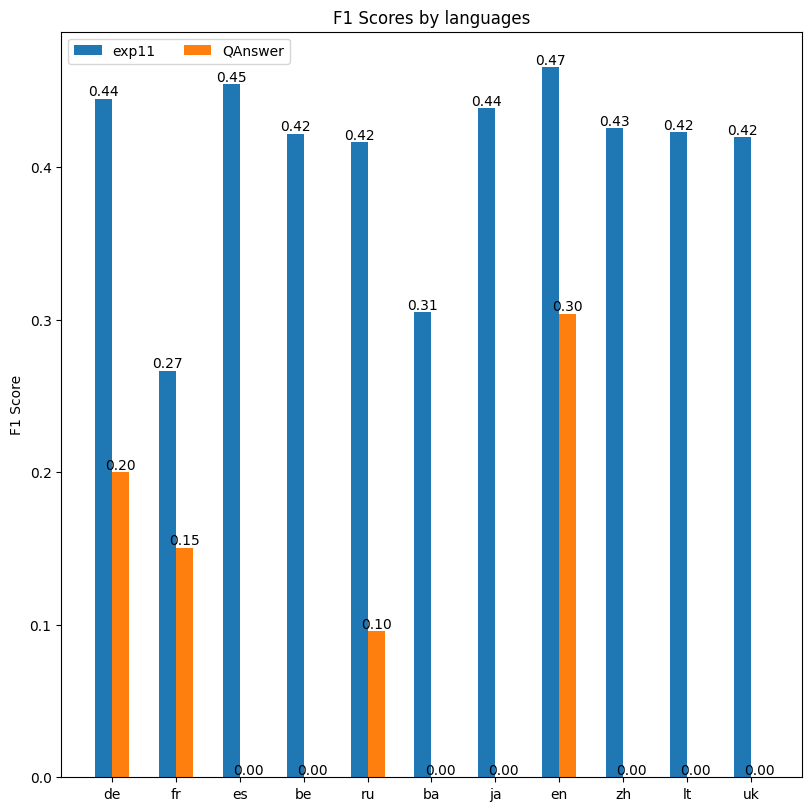

In [22]:
plot({
    "exp11": exp11,
    "QAnswer": qanswer
}, x_distance=1.5)

Compare to QAnswer, our results is significantly better again. 

## Experiment 12

As we did in experiment 9 for Wikidata, we also want to know **the effect of adding entity knowledge** to input questions. 
We only added linguistic context to the input string to see the effect of it. 

Later we will compare it with experiment 11 to see the effect of adding entity knowledge. 

**Keypoints**:

- pre-train on LC-QuAD
    - train for 32 epochs
    - with linguistic context
- fine-tune on qald-9-plus
    - train for 15 epochs
    - use all languages
    - with linguistic context

In [5]:
exp12 = pd.read_csv("../gerbil_results/exp12-mt5xl-lcquad1-lc-dbp.csv")
exp12

,Language,Micro F1,Micro Precision,Micro Recall,Macro F1,Macro Precision,Macro Recall,Macro F1 QALD
0,ba,0.0220,0.0131,0.0696,0.2984,0.2995,0.3102,0.4578
1,be,0.1283,0.1100,0.1539,0.4337,0.4410,0.4492,0.5904
2,de,0.0774,0.0525,0.1467,0.4451,0.4489,0.4714,0.6010
3,en,0.1394,0.1036,0.2129,0.4715,0.4747,0.4961,0.6242
4,es,0.0588,0.0366,0.1489,0.4438,0.4547,0.4753,0.6057
5,fr,0.0449,0.9022,0.0230,0.2666,0.2667,0.2665,0.4191
6,ja,0.0972,0.0616,0.2304,0.4185,0.4249,0.4354,0.5601
7,lt,0.0479,0.0292,0.1325,0.4332,0.4391,0.4551,0.5934
8,ru,0.0657,0.0429,0.1397,0.4214,0.4268,0.4381,0.5759
9,uk,0.0519,0.0317,0.1444,0.4393,0.4493,0.4719,0.5979


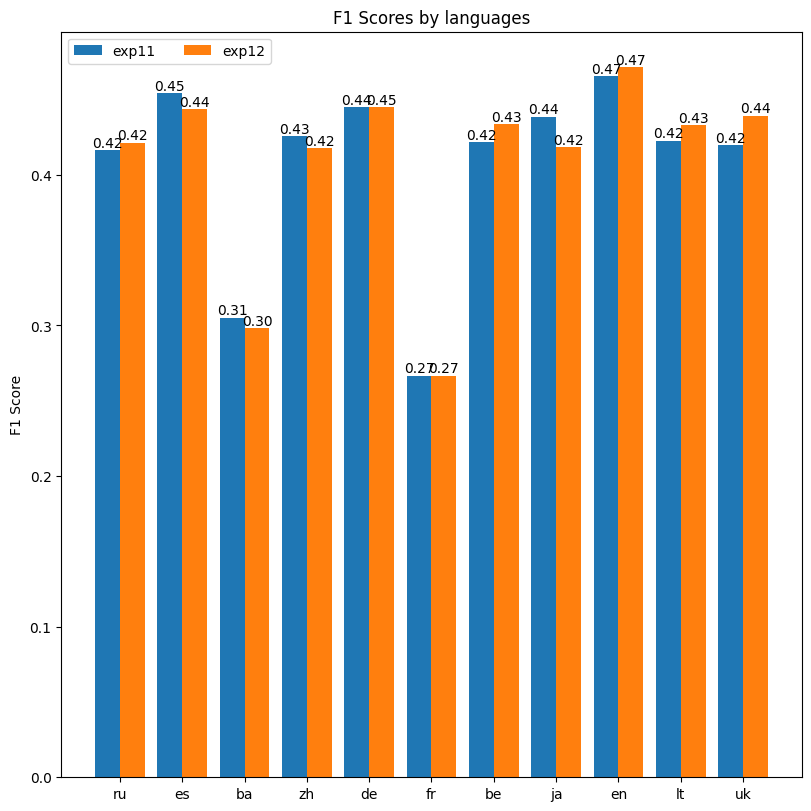

In [24]:
plot({
    "exp11": exp11,
    "exp12": exp12
})

The results from exp11 and exp12 are very close. exp12 performs a little better in some languages and a little worse in others, but the overall difference is not large.

We can infer that adding entity knowledge to the input strings doesn't have a huge impact for DBpedia. 
This could be related to the representation of entities and relations in DBpedia SPARQLs. 
Not like in Wikidata, the entities and relations are represented in letter + number, the representations are real words. If the tokenizer tokenizes an entity or a relation to subwords, the language model already has some knowledge about the entity or the relation. 

## Experiment 13

Considering the positional embedding of language model, we did this experiment. 
In experiment 13, we padded our input string to 133 tokens.
Specifically, 
- 32 tokens for question string, 
- 32 tokens for POS-tags, 
- 32 tokens for dependency relation,
- 32 tokens for dependency relation depth,
- and 5 tokens for entities.

With padding, our language model knows from which position to which position, which component would appear, because our input string always has the same structure. 

We pre-trained our model on LC-QuAD 1.0 with linguistic context and entity knowledge. 

In fine-tuning, we did two variations:
- First, we fine-tuned on all languages without entity knowledge, so that entity linker is not needed in inference.
- Another option is to only fine-tune on `en`, `de`, and `fr` with entity knowledge. 
Entity linker was involved in inference to provide entity knowledge to our input string. 

**Keypoints**:

- pre-train on LC-QuAD
    - train for 15 epochs
    - with linguistic context and entity knowledge
    - **pad to 133 tokens**
- fine-tune on qald-9-plus
    - train for 15 epochs
    - use all languages / only de en fr
    - with linguistic context and with/without entity knowledge
    - **pad to 133 tokens**

In [2]:
exp13_ptek = pd.read_csv("../gerbil_results/exp13-mt5xl-lcquad-lc-ptek-pad-dbp.csv")
exp13_ptek

,Language,Micro F1,Micro Precision,Micro Recall,Macro F1,Macro Precision,Macro Recall,Macro F1 QALD
0,ba,0.0264,0.0157,0.0832,0.2982,0.2995,0.3099,0.4592
1,be,0.1519,0.2358,0.1120,0.3830,0.3851,0.3892,0.5369
2,de,0.2197,0.6851,0.1309,0.3937,0.3952,0.4095,0.5509
3,en,0.1315,0.1197,0.1458,0.4467,0.4466,0.4683,0.5996
4,es,0.0718,0.0476,0.1461,0.4277,0.4276,0.4562,0.5865
5,fr,0.0449,0.9022,0.0230,0.2666,0.2667,0.2665,0.4191
6,ja,0.0679,0.0409,0.2002,0.4126,0.4179,0.4341,0.5589
7,lt,0.1898,0.1917,0.1880,0.4034,0.4153,0.4183,0.5647
8,ru,0.1026,0.0892,0.1206,0.3953,0.3934,0.4180,0.5553
9,uk,0.0819,0.0594,0.1314,0.3707,0.3724,0.3915,0.5284


In [3]:
exp13_endefr = pd.read_csv("../gerbil_results/exp13-mt5xl-lcquad-lc-ek-pad-dbp-endefr.csv")
exp13_endefr

,Language,Micro F1,Micro Precision,Micro Recall,Macro F1,Macro Precision,Macro Recall,Macro F1 QALD
0,de,0.0315,0.0205,0.0679,0.3555,0.3528,0.3732,0.5102
1,en,0.0596,0.0412,0.1076,0.4313,0.4407,0.4487,0.5835
2,fr,0.0310,0.7500,0.0158,0.2666,0.2667,0.2665,0.4197


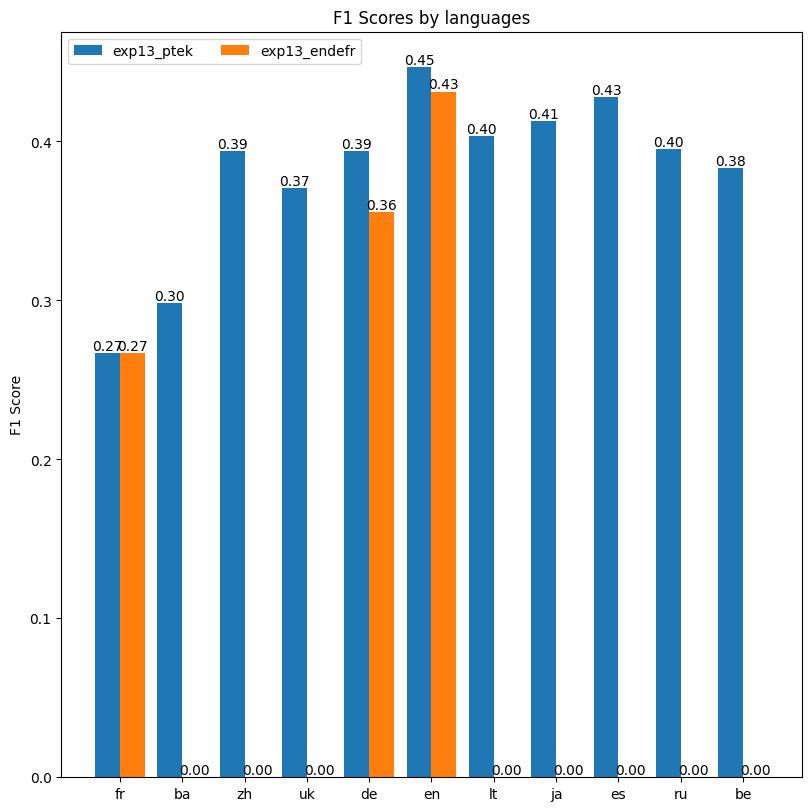

In [4]:
plot({
    "exp13_ptek": exp13_ptek,
    "exp13_endefr": exp13_endefr
})

On `fr` the two settings have the same F1 score, but on `de` and `en`, endefr model performs worse than the model without entity knowledge in fine-tuning. 

It could be that the performance of the entity linker decreases our model performance as in experiment 10. 
Hence, the performance would be better when the language model learns the entities by itself, instead of providing entity knowledge. 

### Compare to other models

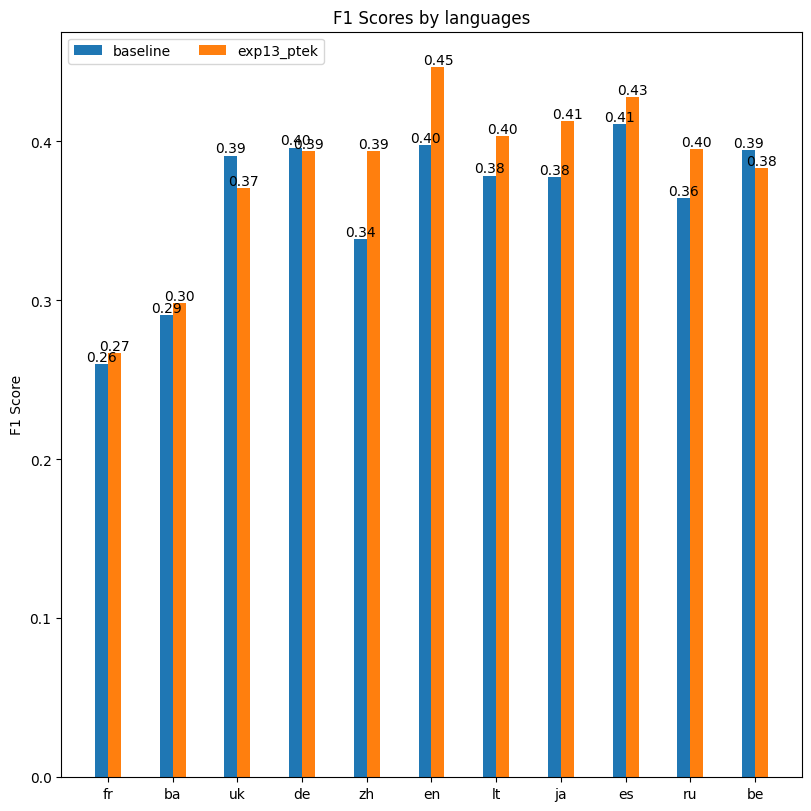

In [11]:
plot({
    "baseline": baseline,
    "exp13_ptek": exp13_ptek, 
}, 2)

For the most languages, our model with padding performs better than our baseline.
However, we don't know if this increase is caused by additional linguistic context and entity knowledge, or the new padding. 

Hence, we need to compare it with exp11, which use the same setting as in exp13. 
The only difference is that input strings in exp13 are padded to 133 tokens.

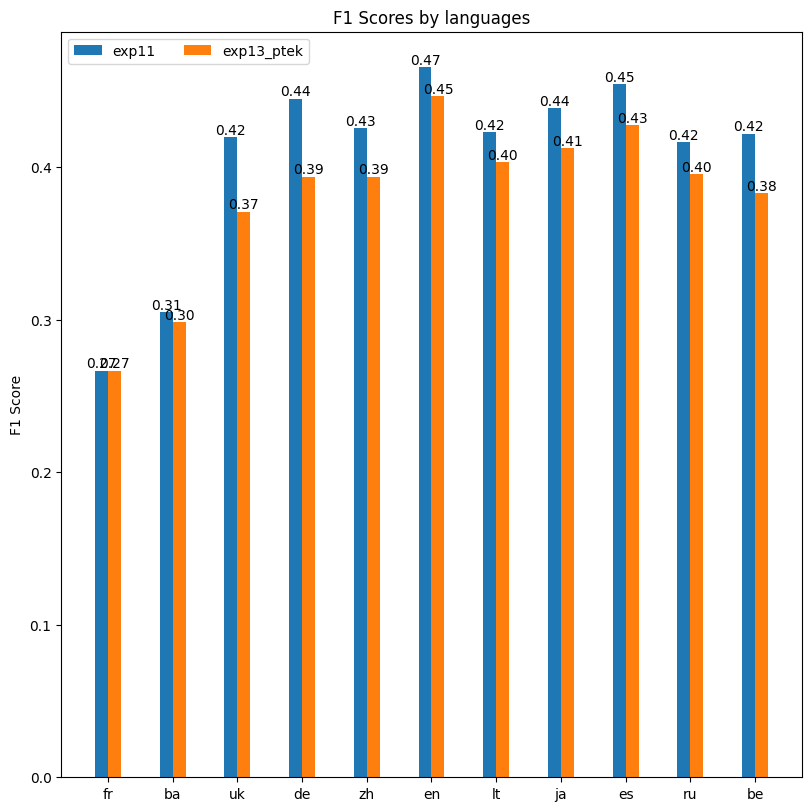

In [10]:
plot({
    "exp11": exp11,
    "exp13_ptek": exp13_ptek, 
}, 2)

Comparing to experiment 11, exp13 performs worse. 
Padding on input string has a negative effect for DBpedia. 